Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:
применять библиотеку SciPy для минимизации функций
делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению


Введение
В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

# Part 1. Smooth function minimization

1.Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [73]:
import numpy as np
import scipy as sp
%matplotlib inline
from matplotlib import pylab as plt

In [74]:
#Define the function
def f(x):
    return (np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0))

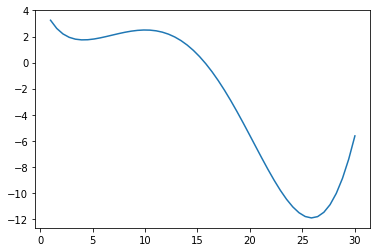

In [75]:
#Зададим непрерывную последовательность чисел при помощи numpy.linspace()
x = np.linspace(1, 30)
y = f(x)

#Построение графика функции и его отображение matplotlib.pylab.plot()
plt.plot(x, y)
plt.show()

2.В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3.Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

# I. Minimize method (scipy.optimize.minimize())

In [115]:
#Start condition
x0 = int(input("Enter the start condition : "))

#Minimum value, NELDER_MID method as default method

min_value = sp.optimize.minimize(f, x0)
print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', np.round(min_value.fun, decimals=2))

Enter the start condition : 2
Minimum x = 4.14
f(x = min_value) = 1.75


# II. BFGS method (scipy.optimize.minimize(method= 'BFGS'))

In [116]:
#Start condition
x0 = int(input("Enter the start condition : "))


min_value = sp.optimize.minimize(f, x0, method='BFGS')
print(min_value, '\n')
print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', np.round(min_value.fun, decimals=2))

Enter the start condition : 2
      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618]) 

Minimum x = 4.14
f(x = min_value) = 1.75


In [117]:
#Открытие файла на запись
with open("result_part_1.txt", 'w') as file:
    file.write(str(np.round(min_value.fun, decimals=2)) + ' ')

In [118]:
#Start condition
x0 = int(input("Enter the start condition : "))


min_value = sp.optimize.minimize(f, x0, method='BFGS')
print(min_value, '\n')

print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', np.round(min_value.fun, decimals=2))

Enter the start condition : 30
      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339]) 

Minimum x = 25.88
f(x = min_value) = -11.9


In [119]:
#Открытие файла на дозапись
with open("result_part_1.txt", 'a') as file:
    file.write(str(np.round(min_value.fun, decimals=2)))

# Part 2. Smooth function global minimization

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

# I. Evolution method (scipy.optimize.differential_evolution())

In [131]:
#Start condition
from scipy.optimize import differential_evolution
x0 = tuple(map(int, input().split()))
print(x0)

min_value = optimize.differential_evolution(f, [x0])
print(min_value, '\n')
print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', *np.round(min_value.fun, decimals=2))

1 30
(1, 30)
     fun: array([-11.89889467])
     jac: array([1.42108535e-06])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019506]) 

Minimum x = 25.88
f(x = min_value) = -11.9


In [132]:
#Открытие файла на запись
with open("result_part_2.txt", 'w') as file:
    file.write(str(*np.round(min_value.fun, decimals=2)) + ' ')

# Part 3. Non-smooth function global minimization

In [122]:
#Define the new function, ring to mind like int use @@np.int_@@
def h(x):
    return np.int_((np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)))

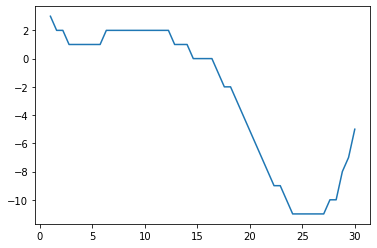

In [123]:
#Зададим непрерывную последовательность чисел при помощи numpy.linspace()
x = np.linspace(1, 30)
y = h(x)

#Построение графика функции и его отображение matplotlib.pylab.plot()
plt.plot(x, y)
plt.show()

# I. BFGS method (scipy.optimize.minimize(method= 'BFGS'))

In [124]:
#Start condition
x0 = int(input("Enter the start condition : "))
print('\n')

min_value = sp.optimize.minimize(h, x0, method='BFGS')
print(min_value, '\n')
print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', np.round(min_value.fun, decimals=2))

Enter the start condition : 30


      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.]) 

Minimum x = 30.0
f(x = min_value) = -5


In [125]:
#Открытие файла на запись
with open("result_part_3.txt", 'w') as file:
    file.write(str(np.round(min_value.fun, decimals=2)) + ' ')

# Evolution method (scipy.optimize.differential_evolution())

In [127]:
#Start condition
from scipy.optimize import differential_evolution
x0 = tuple(map(int, input().split()))
print(x0)

min_value = optimize.differential_evolution(h, [x0])
print(min_value, '\n')
print('Minimum x =', *np.round((min_value.x), decimals=2))
print('f(x = min_value) =', np.round(min_value.fun, decimals=2))

1 30
(1, 30)
     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([24.03291112]) 

Minimum x = 24.03
f(x = min_value) = -11.0


In [128]:
#Открытие файла на дозапись
with open("result_part_3.txt", 'a') as file:
    file.write(str(np.round(min_value.fun, decimals=2)))